# **Statistical Analysis**


**Subject**: Probability and Statistics I \
**Code**: NMAI059 \
**Guarantor**: doc. Mgr. Robert Šámal, Ph.D. \
**Practicals Teacher**: Mgr. Petr Chmel \
**Practicals Code**: 22bNMAI059x01


**2022/2023 summer semester**\
**Patrik Backo, Second year Bc. student**

## Analysing Sleeping Habits

I am going to analyse sleeping habits of 374 people from dataset downloaded [here](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset). Dataset contains information about people such as profession, average sleep duration and quality, BMI Category and more. 

I am going to use t-test and correlation to try to answer several questions.

I assume that the empiric data is **normally distributed** and that the samples are **independent**.

I will be using α = 0.05 for all tests.

### Importing libraries and loading dataset

In [95]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as st
import scipy.special as sp

%matplotlib inline

In [96]:
DATASET_PATH = ".\data\sleep_health_and_lifestyle_dataset.csv"
data = pd.read_csv(DATASET_PATH)

### Sleep duration with regard to the profession

In this part, we will try to answer the question whether there is a difference in sleep duration between people with different professions. We will use t-test to answer these questions.

#### All people

First, I will load sleep durations of all people and plot it.

People Count: 374
Histogram:


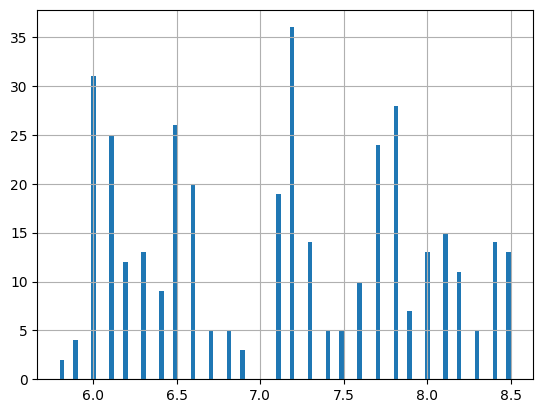

In [97]:
sleep_duration_all = data['Sleep Duration']
sleep_duration_all.hist(bins=100)
print(f"People Count: {sleep_duration_all.size}")
print("Histogram:")

#### Doctors

Now, I will look at the sleep duration of doctors. I will compare it to the sleep duration of all people in the dataset. 

Doctors know what is good for human body, so I would assume that they sleep more than the average person. However, they are also very busy, and often doctors neglect their health. Therefore, our hypotheses will look like this.

**Null Hypothesis**: Lawyers sleep more or the same than all people in the dataset.  \
**Alternative Hypothesis**: Doctors sleep less than all people in the dataset.


Doctors count: 71
Histogram:


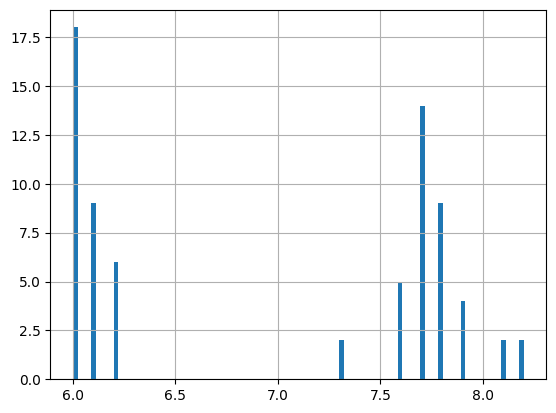

In [98]:
sleep_duration_doctors = data['Sleep Duration'][data['Occupation'] == 'Doctor']
sleep_duration_doctors.hist(bins=100)
print(f"Doctors count: {sleep_duration_doctors.size}")
print("Histogram:")

In [99]:
t_test_doctors = st.ttest_ind(sleep_duration_doctors, sleep_duration_all, alternative="less")

print(f"statistic = {t_test_doctors.statistic}")
print(f"p-value = {t_test_doctors.pvalue}")

statistic = -1.5479001279786377
p-value = 0.06118020204956452


*0.0611 > 0.05*, so I **cannot reject the null hypothesis**. P-value is very close to significance level, so it seems that doctors sleep a bit less than the average person, however, we cannot be sure, because it is not low enough for our chosen significance level.

#### Lawyers

Now, I will look at the sleep duration of lawyers. I will compare it to the sleep duration of all people in the dataset.

Lawyers are also very busy, and they often work long hours. Therefore, I would assume that they sleep less than the average person. 

**Null Hypothesis**: Lawyers sleep more or the same than all people in the dataset. \
**Alternative Hypothesis**: Lawyers sleep less than all people in the dataset.

Lawyers count: 47
Histogram:


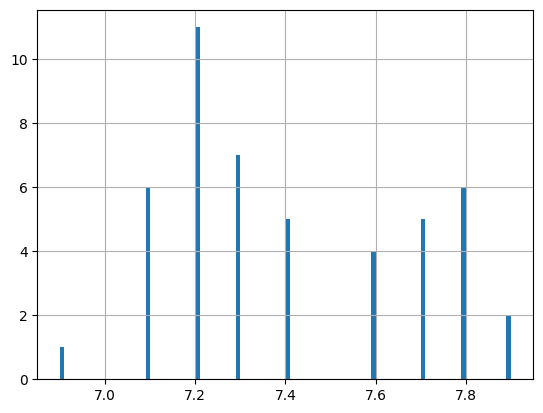

In [100]:
sleep_duration_lawyers = data['Sleep Duration'][data['Occupation'] == 'Lawyer']
sleep_duration_lawyers.hist(bins=100)
print(f"Lawyers count: {sleep_duration_lawyers.size}")
print("Histogram:")

In [101]:
t_test_lawyers = st.ttest_ind(sleep_duration_lawyers, sleep_duration_all, alternative="less")

print(f"statistic = {t_test_lawyers.statistic}")
print(f"p-value = {t_test_lawyers.pvalue}") 

statistic = 2.3807055121595426
p-value = 0.9911371672272025


0.9911 > 0.5 so I **cannot reject the null hypothesis**. Result is very suprising for me, because p-value is almost 1, so I will try another test with opposite hypotheses.

**Null Hypothesis**: Lawyers sleep less or the same than all people in the dataset. \
**Alternative Hypothesis**: Lawyers sleep more than all people in the dataset.

In [102]:
t_test_lawyers = st.ttest_ind(sleep_duration_lawyers, sleep_duration_all, alternative="greater")

print(f"statistic = {t_test_lawyers.statistic}")
print(f"p-value = {t_test_lawyers.pvalue}") 

statistic = 2.3807055121595426
p-value = 0.008862832772797601


0.0089 < 0.05 so I **reject the null hypothesis**. P-value is quite lower than significance level, so based on this dataset, I can say that lawyers sleep more than the average person.

#### Engineers

Now, I will look at the sleep duration of engineers. I will compare it to the sleep duration of all people in the dataset.

I think Engineering is a very demaning profession for mind. So I would assume that engineers sleep more than the average person, so they can rest their mind.

**Null Hypothesis**: There is no difference in sleep duration between engineers and all people in the dataset. \
**Alternative Hypothesis**: Engineers sleep more than all people in the dataset.

Engineers count: 63
Histogram:


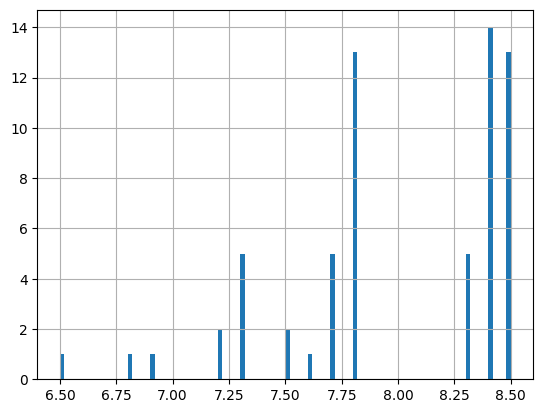

In [103]:
sleep_duration_engineers = data['Sleep Duration'][data['Occupation'] == 'Engineer']
sleep_duration_engineers.hist(bins=100)
print(f"Engineers count: {sleep_duration_engineers.size}")
print("Histogram:")

In [104]:
t_test_engineers = st.ttest_ind(sleep_duration_engineers, sleep_duration_all, alternative="greater")

print(f"statistic = {t_test_engineers.statistic}")
print(f"p-value = {t_test_engineers.pvalue}")

statistic = 8.245288098891443
p-value = 9.841938564249167e-16


9.8419 e-16 < 0.05 so I **reject the null hypothesis**. P-value is much lower than significance level, so based on this dataset, I can say that engineers sleep more than the average person.

### Sleep quality with regard to the BMI category

In this part, I will try to answer the question whether there is a difference in sleep duration and quality between people with different BMI categories. I will use t-test to answer this question.

#### Sleep quality all people

First, I will load sleep quality of all people and plot it.

People Count: 374
Histogram:


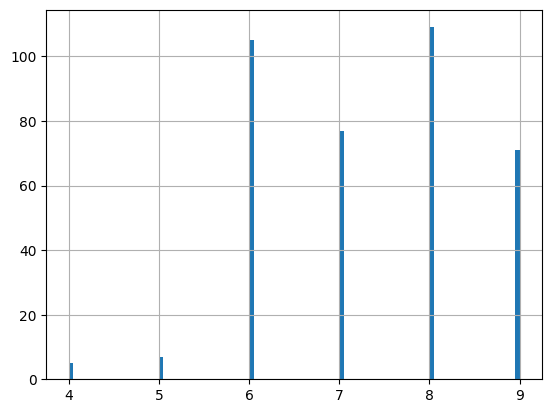

In [105]:
sleep_quality_all = data['Quality of Sleep']
sleep_quality_all.hist(bins=100)
print(f"People Count: {sleep_quality_all.size}")
print("Histogram:")

#### Sleep quality of people with normal weight

Now, I will look at the sleep quality of people with normal BMI. I will compare it to the sleep quality of all people in the dataset.

I would assume that people with normal BMI have the same sleep quality as the average person. Therefore, our hypotheses will look like this.

**Null Hypothesis**: People with normal BMI have the same sleep quality as all people in the dataset. \
**Alternative Hypothesis**: People with normal BMI have different sleep quality than all people in the dataset.

People with normal BMI count: 216
Histogram:


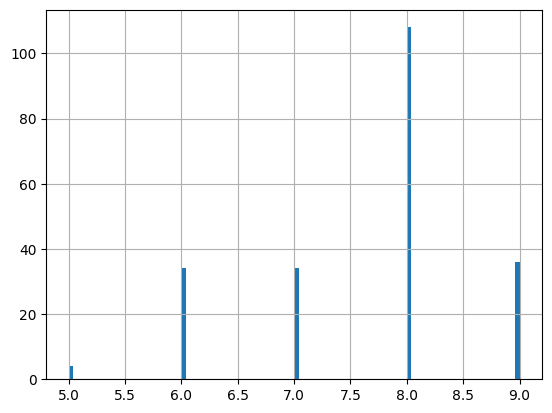

In [106]:
sleep_quality_normal = data['Quality of Sleep'][data['BMI Category'].isin(['Normal Weight', "Normal"])]
sleep_quality_normal.hist(bins=100)
print(f"People with normal BMI count: {sleep_quality_normal.size}")
print("Histogram:")

In [107]:
t_test_normal = st.ttest_ind(sleep_quality_normal, sleep_quality_all, alternative="two-sided")

print(f"statistic = {t_test_normal.statistic}")
print(f"p-value = {t_test_normal.pvalue}")

statistic = 3.38218758333865
p-value = 0.0007668787733256043


0.0007 < 0.05 so I **reject the null hypothesis**. P-value is lower than significance level, so based on this dataset, I can say that people with normal BMI have different sleep quality than the average person. Statistic has positive value, so it seems that people with normal BMI have better sleep quality than the average person.

#### Sleep quality of people with overweight or obese BMI

Now, I will look at the sleep quality of people with overweight or obese BMI. I will compare it to the sleep quality of all people in the dataset.

I would assume that people with overweight or obese BMI have worse sleep quality than the average person, because they are more likely to have health problems. Therefore, our hypotheses will look like this.

**Null Hypothesis**: People with overweight or obese BMI have the same or better sleep quality than all people in the dataset. \
**Alternative Hypothesis**: People with overweight or obese BMI have worse sleep quality than all people in the dataset.

People with overweight or obese BMI count: 158
Histogram:


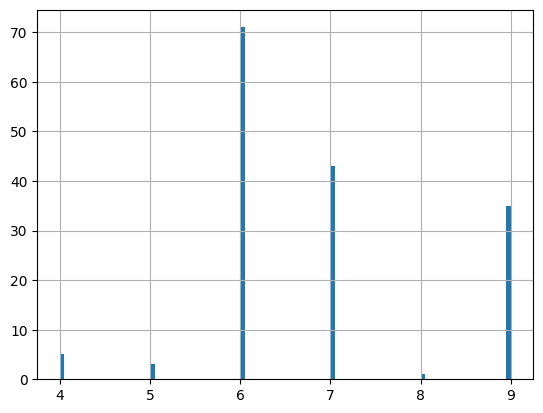

In [108]:
sleep_quality_overweight = data['Quality of Sleep'][data['BMI Category'].isin(['Overweight', "Obese"])]
sleep_quality_overweight.hist(bins=100)
print(f"People with overweight or obese BMI count: {sleep_quality_overweight.size}")
print("Histogram:")

In [109]:
t_test_overweight = st.ttest_ind(sleep_quality_overweight, sleep_quality_all, alternative="less")

print(f"statistic = {t_test_overweight.statistic}")
print(f"p-value = {t_test_overweight.pvalue}")

statistic = -3.822291315151108
p-value = 7.395572475493243e-05


7.3956 e-05 < 0.05 so I **reject the null hypothesis**. P-value is lower than significance level, so based on this dataset, I can say that people with overweight or obese BMI have worse sleep quality than the average person.

### Correlation 

In this part, I will try to answer the question whether there is a correlation between sleep duration, sleep quality and stress level. I will use Pearson correlation to answer these questions.

#### Correlation between sleep duration and sleep quality

First, I will load sleep quality and sleep duration of all people and plot it.

Histogram:


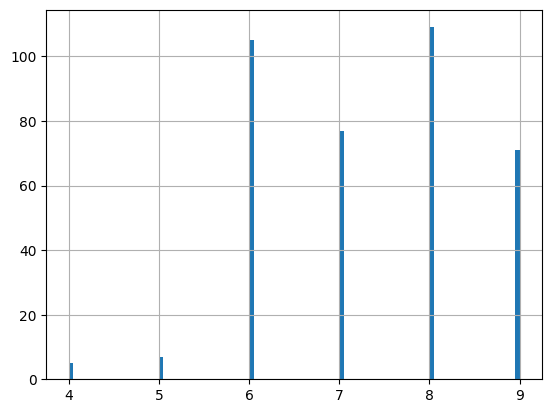

In [110]:
sleep_quality_all = data['Quality of Sleep']
sleep_quality_all.hist(bins=100)
print("Histogram:")

Histogram:


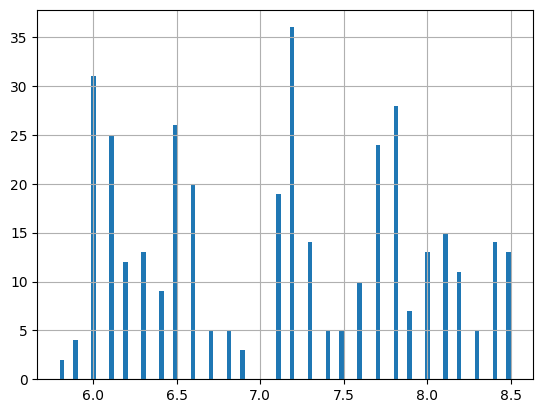

In [111]:
sleep_duration_all = data['Sleep Duration']
sleep_duration_all.hist(bins=100)
print("Histogram:")

I think that longer sleep (if it is not too long) benefits the quality of sleep. Therefore, our hypotheses will look like this. 

**Null Hypothesis**: There is no correlation between sleep duration and sleep quality. \
**Alternative Hypothesis**: There is a positive correlation between sleep duration and sleep quality.

In [112]:
correlation = st.pearsonr(sleep_quality_all, sleep_duration_all)

print(f"correlation = {correlation[0]}")
print(f"p-value = {correlation[1]}")

correlation = 0.883213000410619
p-value = 2.17099177086185e-124


Plot:


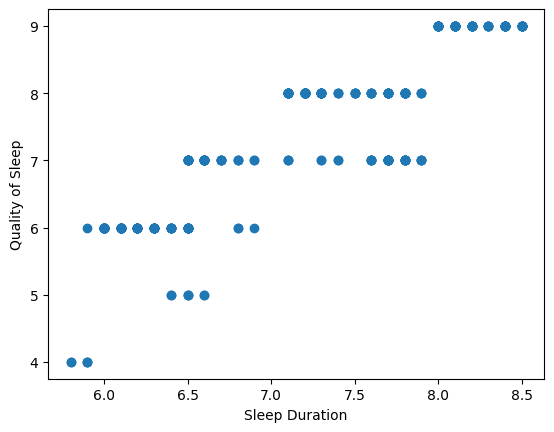

In [113]:
print("Plot:")

plt.scatter(sleep_duration_all, sleep_quality_all)
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()


2.1710 e-124 < 0.05 so I **reject the null hypothesis**. P-value is much much lower than significance level. So based on this dataset, I can say that there is a significant positive correlation between sleep duration and sleep quality. We can also see this on the plot.

#### Correlation between sleep quality and stress level

First, I will load stress level of all people and plot it. (I will not load sleep quality again, because I already loaded it in previous part.)

Histogram:


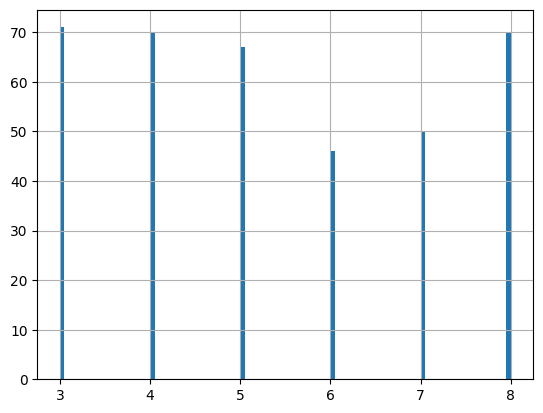

In [114]:
stress_all = data['Stress Level']
stress_all.hist(bins=100)
print("Histogram:")

I would say that higher stress level leads to worse sleep quality. Therefore, our hypotheses will look like this.

**Null Hypothesis**: There is no correlation between sleep quality and stress level. \
**Alternative Hypothesis**: There is a negative correlation between sleep quality and stress level.

In [115]:
correlation = st.pearsonr(sleep_quality_all, stress_all)

print(f"correlation = {correlation[0]}")
print(f"p-value = {correlation[1]}")

correlation = -0.8987520310040419
p-value = 2.880124240941155e-135


Plot:


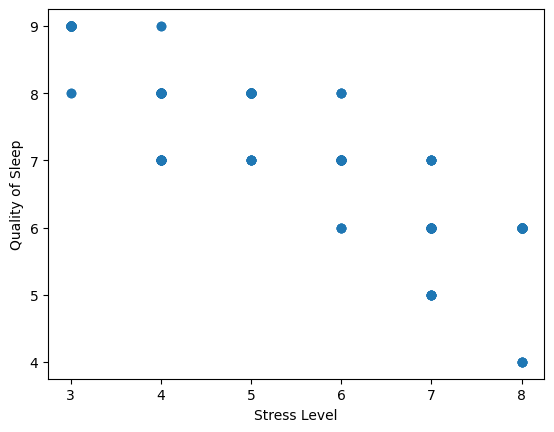

In [116]:
print("Plot:")

plot = plt.scatter(stress_all, sleep_quality_all)
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.show()

2.8801 e-05 < 0.05 so I **reject the null hypothesis**. P-value is much lower than significance level. So based on this dataset, I can say that there is a significant negative correlation between sleep quality and stress level. We can also see this on the plot.

### Conclusion

Most tests resulted as expected. However, I was suprised by the result of *"Sleep duration of lawyers"*. Expectations were that lawyers sleep less than the average person, because they usualy are very busy and hard-working. However result was the exact opposite. Maybe it is because of the small sample size of dataset.